Analysis:

Initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity. As a result of the interviews with pharmacists, decision was made that the subject of analyses and forecasting will be actual drug categories, instead of the individual drugs. Thus, selected group of drugs (57 drugs) is classified to 8 Anatomical Therapeutic Chemical (ATC) Classification System categories:

M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use
ATC codes features are added to the dataset, as indicated on the image below and data was resampled to the monthly time-series.

Only the monthly sales Data is used to compare the drug sales between 2014- 2019 and also detecting which drug was sold most and determining the mean, median, std dev, variance and outliers.
 

In [81]:
import os 
import csv
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
import datetime



Monthly Dataset from Kaggle.com

In [82]:
#Import the dataset 
monthly_sales = "Datasets/salesmonthly.csv"

# Read Pharma_sales Datasets 
pharma_monthly_df = pd.read_csv(monthly_sales)

url="https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data?select=salesmonthly.csv"
url2=requests.get(url)
text=url2.iter_lines()
reader=csv.reader(text,delimiter=',')


#Monthly sales of the drugs in 8 ATC categories, by the single pharmacy store in period of 6 years 

In [83]:
# Remove duplicates or null values
pharma_monthly_df.fillna(pharma_monthly_df,inplace=True)
pharma_monthly_df.drop_duplicates(subset=None, inplace=True)
pharma_monthly_df


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


## Pharma drugs : ATC drug categories over a period of 2014 - 2019

We are looking at the ATC categories and sale count for each category through 2014-2019 
Looking at the bar charts for all the 8 drug types, we can see that trend for sales can be further categorized in 4 groups. 
    
    1. Drugs M01AB and M01AE seem to follow a similar sales trend from 2014 - 2019 and can be grouped together.

    2 Similarly, drugs N02BE, R03 and R06 can be put in another group as they have increasing sales trend from 2014 to 2016 followed by decreasing trend with a significant dip in 2017. 

    3. Drug types N05B and N05C have similar trends and can be group together as well. 

    4.Lastly, drug N02BA is in a group by itself with consistent sales from 2014 to 2016 and then constant decline in sales from 2017 onwards

C:\Users\rupal\AppData\Local\Temp\ipykernel_17996\751895804.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  sorted_total_df = total_df.sort_values((0), ascending=False)


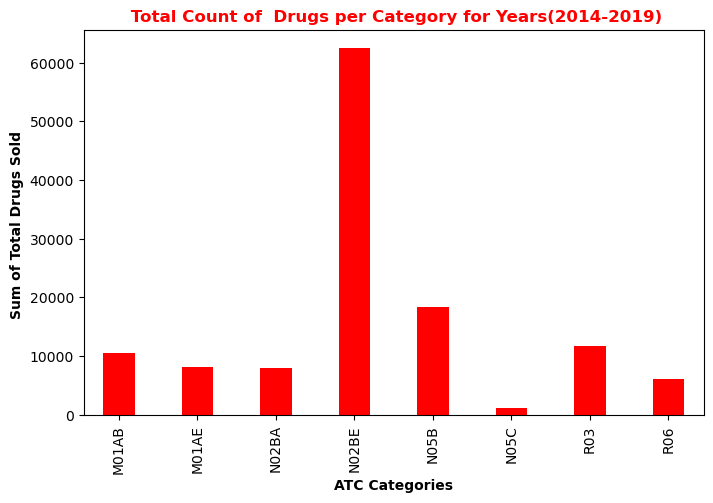

In [84]:
total_df = pharma_monthly_df.iloc[:,1:9].sum(axis=0)

sorted_total_df = total_df.sort_values((0), ascending=False)

total_df.plot(kind= "bar",color="Red",figsize=(8,5),width=0.4)

plt.title(label=' Total Count of  Drugs per Category for Years(2014-2019)',color ="Red",fontweight = 'bold')
plt.xlabel('ATC Categories', fontweight = 'bold')
plt.ylabel('Sum of Total Drugs Sold ', fontweight = 'bold')

plt.show()
plt.close()

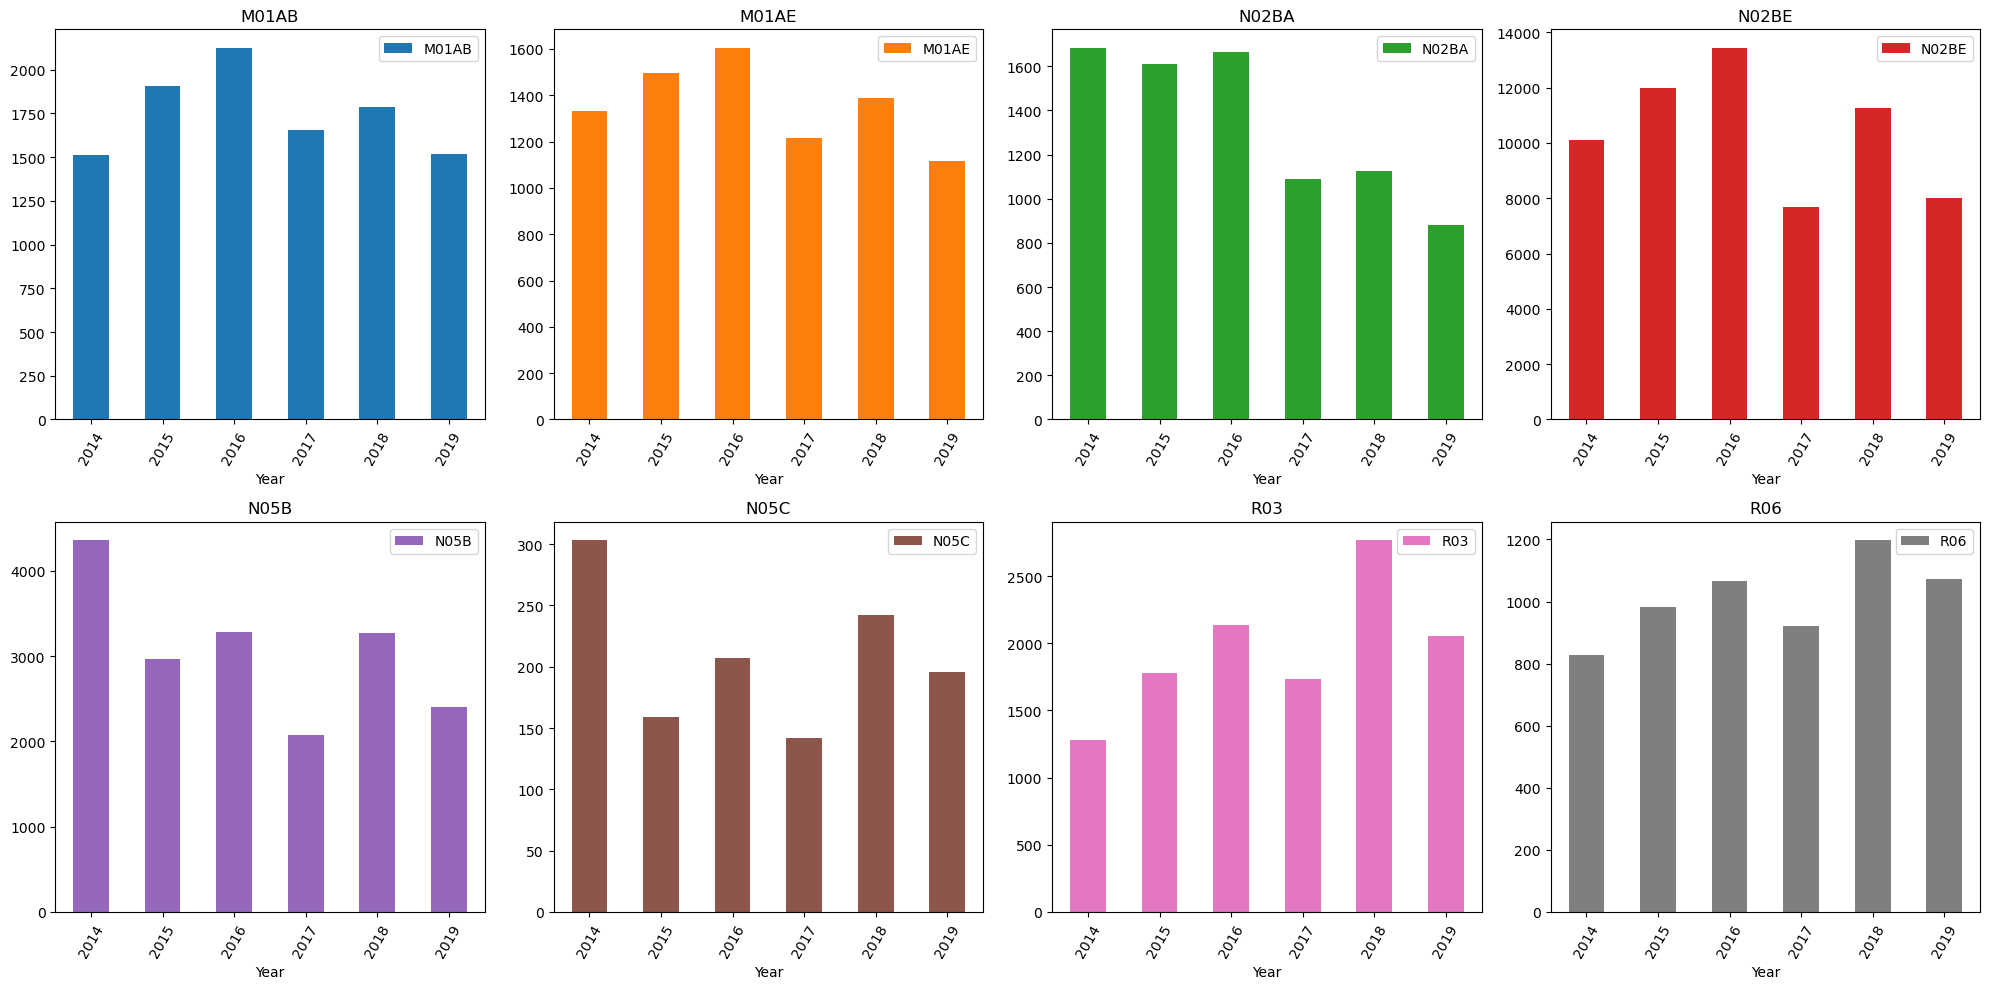

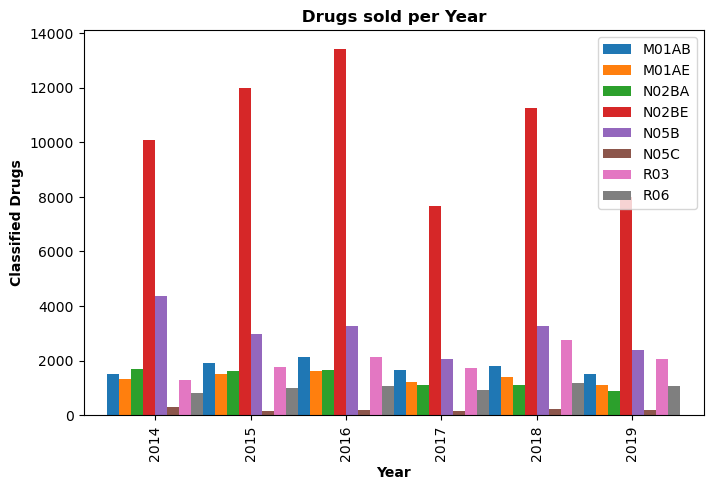

In [85]:
# total count for med sold per year
# RUPAL FINISH GRAPH
pharma_monthly_df['Year'] = pd.DatetimeIndex(pharma_monthly_df['datum']).year
yearly_df = pharma_monthly_df.groupby('Year').sum()
yearly_df.reset_index(0)

fig, a = plt.subplots(2, 4, figsize=(20, 10), tight_layout=True)
yearly_df.plot(kind = "bar", ax=a, subplots=True, rot=60)

yearly_df.plot(kind='bar',figsize=(8,5), width=1)


plt.title(label=' Drugs sold per Year ', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Classified Drugs', fontweight = 'bold')
# plt.savefig("../Images/avg_temp.png")

plt.show()

# plt.close()

## Highest selling Drug Category ( N02BE)

We can see that the drug category N02BE is the highest selling drug with sales count of 10,000  in year 2014 to 13000+ in 2016 but then it had a dip in 2017 with sales of almost 7600, thenin 2018 and 2019 it maintained the sale of 11000- 8000 count . Even with all this rise and dip in sales , the drug N02BE was still able to maintain the highest selling drug 
 


C:\Users\rupal\AppData\Local\Temp\ipykernel_17996\1159816784.py:7: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  sorted_total_df = total_df.sort_values((0), ascending=False)


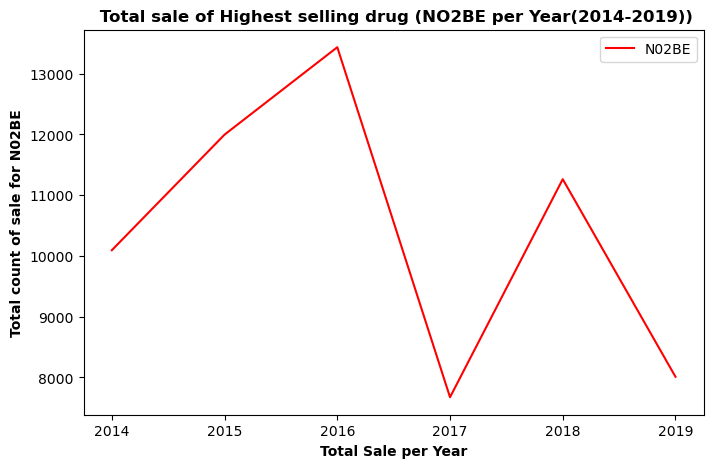

In [86]:
# Get the name of the highest selling drug
# which we will use to then plot that drug by year
# to find its performance

# Highest selling drug key
highest_selling_drug = sorted_total_df.keys()[0]
sorted_total_df = total_df.sort_values((0), ascending=False)

list_of_cols = [highest_selling_drug, 'Year']
hsd_df = pharma_monthly_df.filter(list_of_cols)
hsd_plot_df = hsd_df.groupby("Year").sum(0)
hsd_plot_df



x_axis =hsd_plot_df
y_axis = [highest_selling_drug, 'Year']
hsd_plot_df = hsd_plot_df.plot(color= "Red",figsize=(8,5))

hsd_plot_df.set_title(label=' Total sale of Highest selling drug (NO2BE per Year(2014-2019))', fontweight = 'bold')
hsd_plot_df.set_xlabel('Total Sale per Year', fontweight = 'bold')
hsd_plot_df.set_ylabel('Total count of sale for N02BE', fontweight = 'bold')



plt.show()
plt.close()





## Lowest selling Drug Category ( N05C)

We can see that the drug category N05C is the lowest selling drug  as over the period of 6 years barely the sale was about 1250 for all 6 years. 
Even though this drug was not sold as much in terms of count to other ATC categories, it still had maintained a steady sale count for each year. 
 

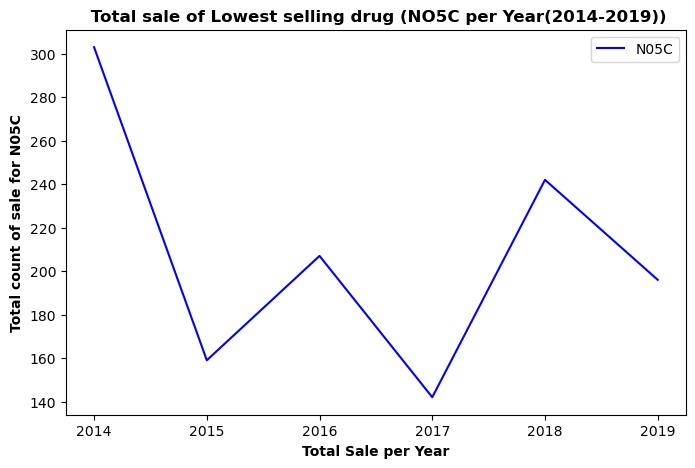

In [87]:
# plt.matshow(pharma_monthly_df.corr())
# plt.show()
lowest_selling_drug =sorted_total_df.keys()[7]

list_of_cols = [lowest_selling_drug, 'Year']
lsd_df = pharma_monthly_df.filter(list_of_cols)
lsd_plot_df = lsd_df.groupby("Year").sum(0)
lsd_plot_df



x_axis =hsd_plot_df
y_axis = [lowest_selling_drug, 'Year']
lsd_plot_df = lsd_plot_df.plot(color= "Blue",figsize=(8,5))

lsd_plot_df.set_title(label=' Total sale of Lowest selling drug (NO5C per Year(2014-2019))', fontweight = 'bold')
lsd_plot_df.set_xlabel('Total Sale per Year', fontweight = 'bold')
lsd_plot_df.set_ylabel('Total count of sale for N05C', fontweight = 'bold')



plt.show()
plt.close()


In [ ]:
#yearly_df.T.plot.bar(stacked = True)
# pharma_monthly_df.columns